In [1]:
%%bash
pip install aplpy
pip install https://github.com/ericmandel/pyds9/archive/master.zip

In [2]:
%%bash
curl -O https://astropy.stsci.edu/data/galactic_center/gc_bolocam_gps.fits
curl -O https://astropy.stsci.edu/data/galactic_center/gc_2mass_k.fits

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1605k  100 1605k    0     0   318k      0  0:00:05  0:00:05 --:--:--  525k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1020k  100 1020k    0     0   385k      0  0:00:02  0:00:02 --:--:--  385k


In [3]:
%matplotlib inline
import pylab as pl

In [4]:
from astropy.io import fits

In [5]:
# load the data (no headers, first extension by default)
# if there are extensions, fits.getdata('file.fits', ext=extension_number)
# if you want many extension, use fits.open('file.fits'), then access each independently
stellardata = fits.getdata('gc_2mass_k.fits')

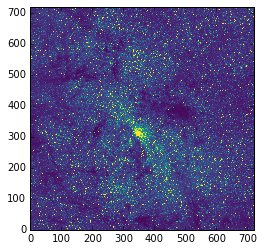

In [21]:
# show the image: vmax sets the brightest displayed pixel
# cmap can be any of the valid matplotlib colormaps (pl.cm....)
pl.imshow(stellardata, cmap='viridis', vmax=1000)

In [8]:
dustdata = fits.getdata('gc_bolocam_gps.fits')

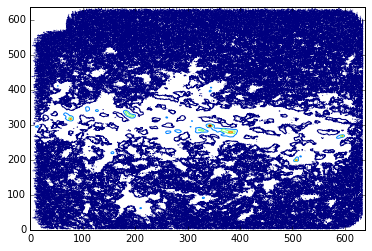

In [9]:
pl.contour(dustdata)

In [13]:
dustdata.shape, dustdata.flatten().shape

((638, 640), (408320,))

In [14]:
np.any(np.isnan(dustdata))

True

In [33]:
# subset of the data that is not nan
# implicitly flattens
non_nan_dustdata = dustdata[~np.isnan(dustdata)]
non_nan_dustdata = dustdata[np.isfinite(dustdata)]
non_nan_dustdata = np.compress(np.isfinite(dustdata.flatten()), dustdata.flatten())
len(non_nan_dustdata)

387921

(array([  8.99060000e+04,   4.93190000e+04,   2.31990000e+04,
          1.36530000e+04,   9.18600000e+03,   7.06700000e+03,
          5.64800000e+03,   4.59500000e+03,   3.70300000e+03,
          3.22000000e+03,   2.68900000e+03,   2.36500000e+03,
          2.08000000e+03,   1.80300000e+03,   1.51600000e+03,
          1.36000000e+03,   1.19100000e+03,   1.01000000e+03,
          8.55000000e+02,   7.91000000e+02,   7.35000000e+02,
          5.62000000e+02,   5.14000000e+02,   4.70000000e+02,
          4.21000000e+02,   3.82000000e+02,   3.33000000e+02,
          2.89000000e+02,   3.03000000e+02,   2.54000000e+02,
          2.61000000e+02,   2.24000000e+02,   2.39000000e+02,
          1.72000000e+02,   2.20000000e+02,   1.57000000e+02,
          1.70000000e+02,   1.63000000e+02,   1.47000000e+02,
          1.54000000e+02,   1.26000000e+02,   1.32000000e+02,
          1.24000000e+02,   1.12000000e+02,   9.00000000e+01,
          9.30000000e+01,   7.90000000e+01,   8.70000000e+01,
        

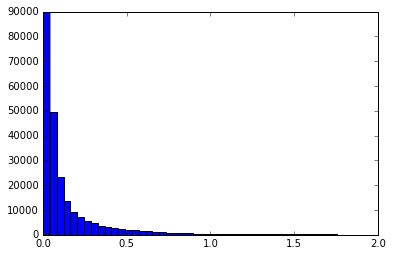

In [17]:
pl.hist(dustdata[~np.isnan(dustdata)], bins=np.linspace(0,2,50))

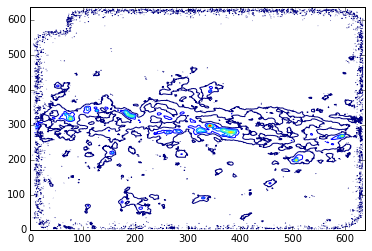

In [18]:
pl.contour(dustdata, levels=np.linspace(0.2, 10, 10))

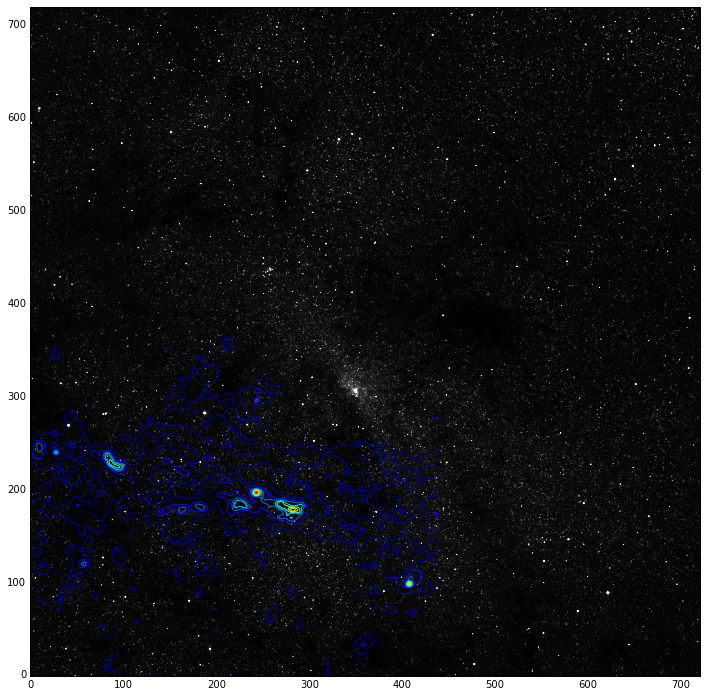

In [34]:
pl.figure(figsize=(12,12))
pl.imshow(stellardata, cmap='gray')
pl.contour(dustdata[100:-100, 100:-100], levels=np.linspace(0.2, 10, 10))

In [35]:
import aplpy

<IPython.core.display.Javascript object>


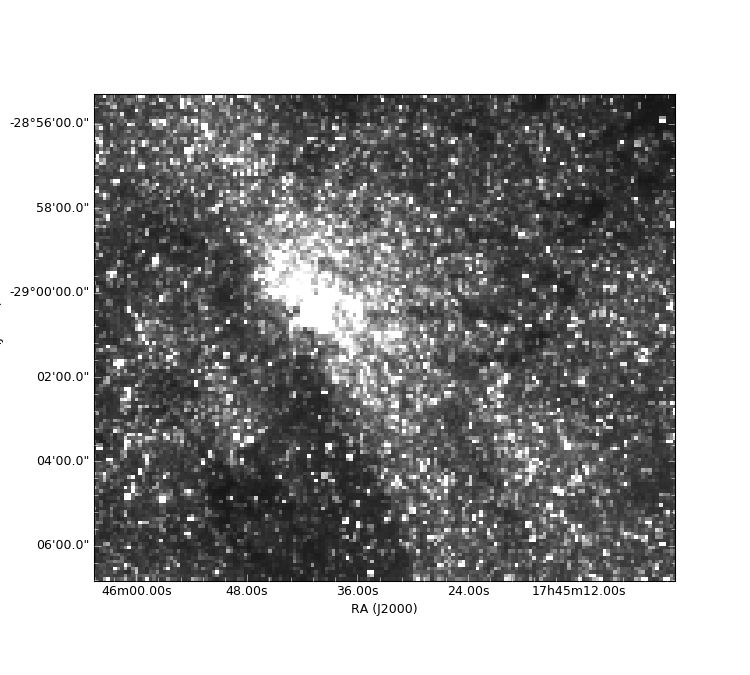

/Users/adam/anaconda/envs/esopython2016/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


INFO: Auto-setting vmin to  4.221e+02 [aplpy.core]


In [40]:
%matplotlib nbagg
FF = aplpy.FITSFigure('gc_2mass_k.fits')
FF.show_grayscale(vmax=1000)

<IPython.core.display.Javascript object>


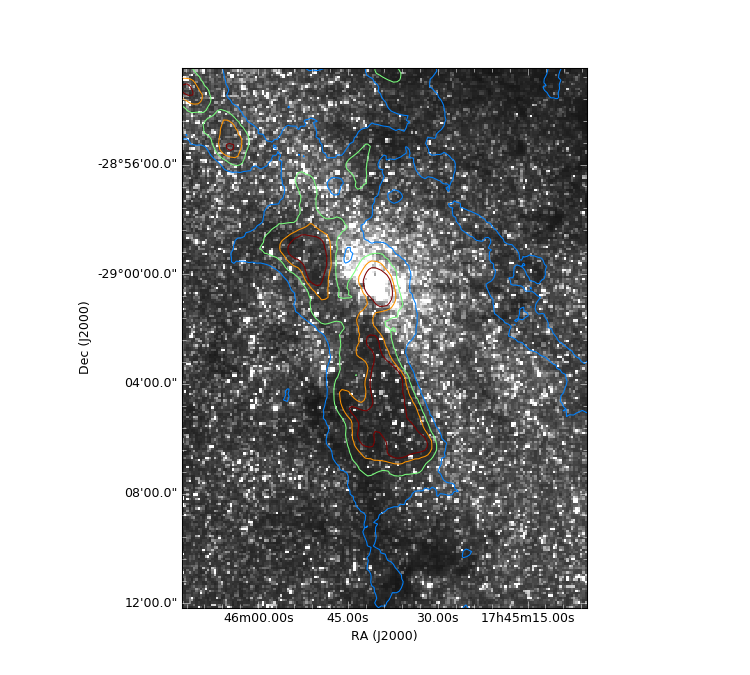

/Users/adam/anaconda/envs/esopython2016/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


INFO: Auto-setting vmin to  4.221e+02 [aplpy.core]


invalid alternate code, keyword resembles LONPOLEa but isn't. [astropy.wcs.wcs]
invalid alternate code, keyword resembles LATPOLEa but isn't. [astropy.wcs.wcs]


In [42]:
%matplotlib nbagg
FF = aplpy.FITSFigure('gc_2mass_k.fits')
FF.show_grayscale(vmax=1000)
# convention not generally needed, only for specific (CAR) FITS projections
FF.show_contour('gc_bolocam_gps.fits', convention='calabretta')

<IPython.core.display.Javascript object>


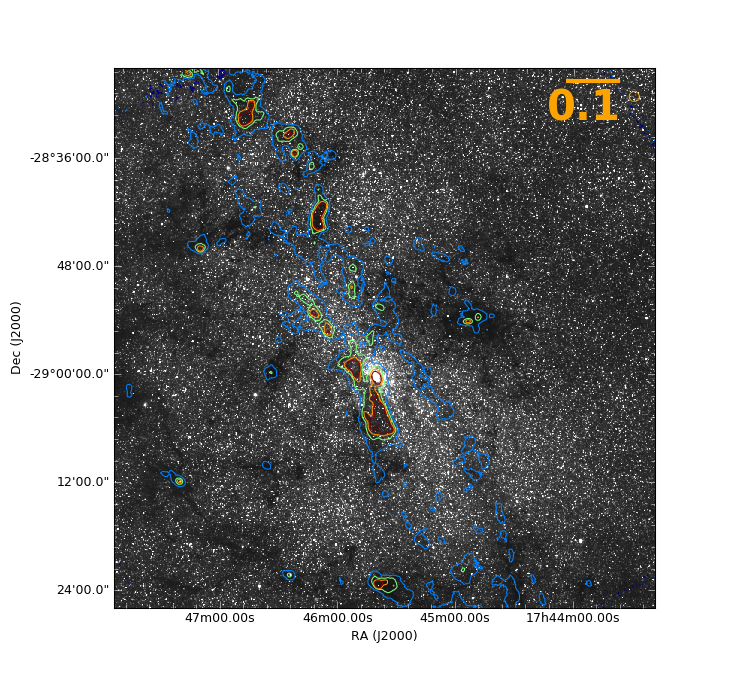

/Users/adam/anaconda/envs/esopython2016/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


INFO: Auto-setting vmin to  4.221e+02 [aplpy.core]


invalid alternate code, keyword resembles LONPOLEa but isn't. [astropy.wcs.wcs]
invalid alternate code, keyword resembles LATPOLEa but isn't. [astropy.wcs.wcs]


In [63]:
%matplotlib nbagg
FF = aplpy.FITSFigure('gc_2mass_k.fits')
FF.show_grayscale(vmax=1000)
# convention not generally needed, only for specific (CAR) FITS projections
FF.show_contour('gc_bolocam_gps.fits', convention='calabretta')
scalebar = FF.add_scalebar(0.1, label='0.1$^\circ$', color='orange')
FF.scalebar.set_corner('top right')
FF.scalebar.set_font_size(40)
FF.scalebar.set_font_weight('bold')
FF.scalebar.set_linewidth(4)
FF.scalebar.set_label('0.1$^\circ$')

In [68]:
import astroquery
from astropy import units as u

In [83]:
from astroquery.irsa import Irsa
from astroquery.vizier import Vizier
from astroquery.eso import Eso

In [90]:
Eso.ROW_LIMIT = 500

In [89]:
Eso.query_instrument('naco', help=True)

INFO: List of the column_filters parameters accepted by the naco instrument query. [astroquery.eso.core]
INFO: The presence of a column in the result table can be controlled if prefixed with a [ ] checkbox. [astroquery.eso.core]
INFO: The default columns in the result table are shown as already ticked: [x]. [astroquery.eso.core]

Target Information
------------------
    target: 
    resolver: simbad (SIMBAD name), ned (NED name), none (OBJECT as specified by the observer)
    coord_sys: eq (Equatorial (FK5)), gal (Galactic)
    coord1: 
    coord2: 
    box: 
    format: sexagesimal (Sexagesimal), decimal (Decimal)
[x] wdb_input_file: 

Observation and proposal parameters
-----------------------------------
[ ] night: 
    stime: 
    starttime: 00 (00 hrs [UT]), 01 (01 hrs [UT]), 02 (02 hrs [UT]), 03 (03 hrs [UT]), 04 (04 hrs [UT]), 05 (05 hrs [UT]), 06 (06 hrs [UT]), 07 (07 hrs [UT]), 08 (08 hrs [UT]), 09 (09 hrs [UT]), 10 (10 hrs [UT]), 11 (11 hrs [UT]), 12 (12 hrs [UT]), 13 (13 hr

In [85]:
tbl = Eso.query_instrument('naco', target='Sgr A*')
tbl

Object,Target Ra Dec,Target l b,ProgId,DP.ID,OB ID,OBS TARG NAME,EXPTIME,DPR CATG,DPR TYPE,DPR TECH,INS MODE,INS.OPTI1.NAME,INS.OPTI2.NAME,INS.OPTI3.NAME,INS.OPTI4.NAME,INS.OPTI5.NAME,INS.OPTI6.NAME,INS.OPTI7.NAME,DIMM S-avg
str8,str23,str20,str12,str28,int64,str5,float64,str7,str6,str5,int64,str6,str4,str4,str5,str5,str7,str4,str11
Sgr_A,17:45:39.98 -29:00:24.0,359.945099 -0.045387,60.A-9026(A),NACO.2002-04-02T10:09:31.212,1326642301,Sgr_A,0.5,SCIENCE,OBJECT,IMAGE,--,FLM_25,open,Full,empty,empty,Ks,25_S,2.12 [1.57]
Sgr_A,17:45:39.56 -29:00:23.8,359.944362 -0.044064,60.A-9026(A),NACO.2002-04-02T10:15:30.884,1326642301,Sgr_A,0.5,SCIENCE,OBJECT,IMAGE,--,FLM_25,open,Full,empty,empty,Ks,25_S,1.56 [0.94]
Sgr_A,17:45:39.48 -29:00:27.2,359.943415 -0.044298,60.A-9026(A),NACO.2002-04-02T10:15:54.438,1326642301,Sgr_A,0.5,SCIENCE,OBJECT,IMAGE,--,FLM_25,open,Full,empty,empty,Ks,25_S,1.56 [0.94]
Sgr_A,17:45:40.14 -29:00:32.8,359.943313 -0.047146,60.A-9026(A),NACO.2002-04-02T10:16:42.989,1326642301,Sgr_A,0.5,SCIENCE,OBJECT,IMAGE,--,FLM_25,open,Full,empty,empty,Ks,25_S,1.50 [0.88]
Sgr_A,17:45:40.07 -29:00:25.5,359.944946 -0.045885,60.A-9026(A),NACO.2002-04-02T10:17:07.015,1326642301,Sgr_A,0.5,SCIENCE,OBJECT,IMAGE,--,FLM_25,open,Full,empty,empty,Ks,25_S,1.50 [0.88]
Sgr_A,17:45:39.89 -29:00:24.4,359.944848 -0.045169,60.A-9026(A),NACO.2002-04-02T10:17:31.032,1326642301,Sgr_A,0.5,SCIENCE,OBJECT,IMAGE,--,FLM_25,open,Full,empty,empty,Ks,25_S,1.42 [0.78]
Sgr_A,17:45:39.94 -29:00:31.8,359.943193 -0.046372,60.A-9026(A),NACO.2002-04-02T10:17:55.050,1326642301,Sgr_A,0.5,SCIENCE,OBJECT,IMAGE,--,FLM_25,open,Full,empty,empty,Ks,25_S,1.42 [0.78]
Sgr_A,17:45:39.73 -29:00:30.9,359.943014 -0.045600,60.A-9026(A),NACO.2002-04-02T10:18:20.054,1326642301,Sgr_A,0.5,SCIENCE,OBJECT,IMAGE,--,FLM_25,open,Full,empty,empty,Ks,25_S,1.46 [0.81]
Sgr_A,17:45:39.44 -29:00:30.9,359.942449 -0.044710,60.A-9026(A),NACO.2002-04-02T10:18:45.054,1326642301,Sgr_A,0.5,SCIENCE,OBJECT,IMAGE,--,FLM_25,open,Full,empty,empty,Ks,25_S,1.46 [0.81]


In [71]:
rslt = Irsa.query_region('Sgr A*', radius=10*u.arcmin, catalog='pt_src_cat')
#rslt

In [79]:
bright = rslt[rslt['k_m'] < 9]

<IPython.core.display.Javascript object>


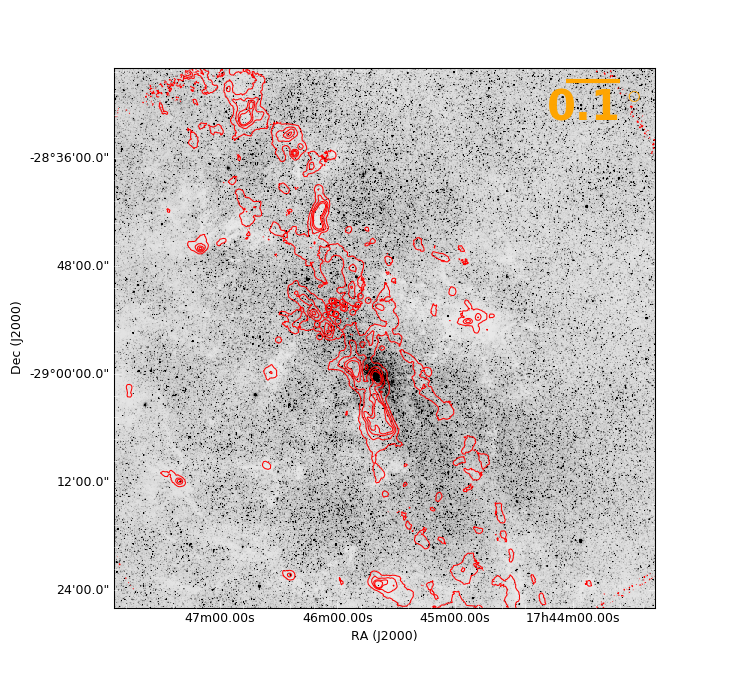

/Users/adam/anaconda/envs/esopython2016/lib/python3.5/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


INFO: Auto-setting vmin to  4.221e+02 [aplpy.core]


invalid alternate code, keyword resembles LONPOLEa but isn't. [astropy.wcs.wcs]
invalid alternate code, keyword resembles LATPOLEa but isn't. [astropy.wcs.wcs]


In [93]:
%matplotlib nbagg
FF = aplpy.FITSFigure('gc_2mass_k.fits')
FF.show_grayscale(vmax=1000, invert=True)
# convention not generally needed, only for specific (CAR) FITS projections
FF.show_contour('gc_bolocam_gps.fits', convention='calabretta', colors=['r'])
scalebar = FF.add_scalebar(0.1, label='0.1$^\circ$', color='orange')
FF.scalebar.set_corner('top right')
FF.scalebar.set_font_size(40)
FF.scalebar.set_font_weight('bold')
FF.scalebar.set_linewidth(4)
FF.scalebar.set_label('0.1$^\circ$')
FF.show_markers(bright['ra'], bright['dec'])

Aside: running external code files

In [ ]:
%run file.py
%run -i file.py
execfile('file.py') # is equivalent to %run -i ...

Visualization Part 2: pyds9

In [5]:
import pyds9
from astropy.io import fits

In [6]:
DD = pyds9.DS9('mine')

In [7]:
DD.set('frame 1')

1

In [8]:
DD.set_pyfits(fits.open('gc_2mass_k.fits'))

1

In [9]:
DD.set('frame lock wcs')
DD.set('frame 2')
DD.set_pyfits(fits.open('gc_bolocam_gps.fits'))

1

In [12]:
DD.set('single')

1

For more information about `ds9` xpa access points, see: ds9.si.edu/doc/ref/xpa.html